<a href="https://colab.research.google.com/github/CharlyPierce/CNN/blob/main/Copy_of_l04c01_image_classification_with_cnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Clasificación de imagenes con Redes Neuronales Convolucionales

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l04c01_image_classification_with_cnns.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l04c01_image_classification_with_cnns.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

En este tutorial, vamos a construir y entrenar una red neuronal para clasificar imagenes de ropa, como tenis o camisas.

No te preocupes si no entiendes todo. Esta es una descripción general rápida de un programa TensorFlow completo, con explicaciones a lo largo del camino. El objetivo es tener una idea general de un proyecto de TensorFlow, no captar todos los detalles.

Esta guía usa [tf.keras](https://www.tensorflow.org/guide/keras), una API de alto nivel para crear y entrenar modelos en TensorFlow.

## Instalación y importacion de dependencias

Necesitaremos [Datasets de TensorFlow](https://www.tensorflow.org/datasets/), una API que simplifica la descarga y el acceso a datasets, y proporciona varias muestras de datasets con los que trabajar. También estamos usando algunas bibliotecas auxiliares.



In [1]:
import tensorflow as tf

In [2]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds#Coleción de Datasets listos para usarse con tf
#tfds.disable_progress_bar()#Deshabilitar barra de progreso
# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import logging#Rastrear errores y dejar rastro de lo que se hace.
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Importar dataset Fashion MNIST

Esta guía utiliza el Dataset [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist), que contiene 70 000 imágenes en escala de grises en 10 categorías. Las imágenes muestran prendas individuales en baja resolución (28 $\times$ 28 píxeles), como se ve aquí:



<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite" width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST está diseñado como un reemplazo directo para el Dataset clásico [MNIST](http://yann.lecun.com/exdb/mnist/), que a menudo se usa como el "Hola, mundo" de los programas de aprendizaje automático para la visión por computadora. . El Dataset MNIST contiene imágenes de dígitos escritos a mano (0, 1, 2, etc.) en un formato idéntico a las prendas de vestir que usaremos aquí.

Esta guía usa Fashion MNIST por variedad y porque es un problema un poco más desafiante que el MNIST normal. Ambos Datasets son relativamente pequeños y se utilizan para verificar que un algoritmo funciona como se espera. Son buenos puntos de partida para probar y depurar código.

Usaremos 60 000 imágenes para entrenar la red y 10 000 imágenes para evaluar la precisión con la que la red aprendió a clasificar imágenes. Puedes acceder a Fashion MNIST directamente desde TensorFlow, usando la API [Datasets](https://www.tensorflow.org/datasets):

In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)#Carga de imagenes fashion_mnist
train_dataset, test_dataset = dataset['train'], dataset['test']#Division en entrenamiento y prueba

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteKETVF9/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteKETVF9/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


La carga del dataset devuelve metadatos, así como un *Dataset de entrenamiento* y un *Dataset de prueba*

* El modelo se entrena usando `train_dataset`.
* El modelo se prueba con `test_dataset`.

Las imágenes son matrices de 28 $\times$ 28, con valores de píxeles en el rango `[0, 255]`. Las *etiquetas* son una matriz de números enteros, en el rango `[0, 9]`. Estos corresponden a la *clase* de ropa que representa la imagen:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>
Cada imagen se asigna a una sola etiqueta. Dado que los *nombres de clase* no se incluyen con el conjunto de datos, guárdelos aquí para usarlos más tarde al trazar las imágenes:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

### Explorando los datos
Exploremos el formato del conjunto de datos antes de entrenar el modelo. A continuación se muestra que hay 60 000 imágenes en el conjunto de entrenamiento y 10 000 imágenes en el conjunto de prueba:

In [8]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Número de ejemplos de entrenamiento: {}".format(num_train_examples))
print("Número de ejemplos de prueba:        {}".format(num_test_examples))

Número de ejemplos de entrenamiento: 60000
Número de ejemplos de prueba:        10000


##Prepocesamiento de datos

El valor de cada píxel en los datos de la imagen es un número entero en el rango `[0,255]`. Para que el modelo funcione correctamente, estos valores deben normalizarse al rango `[0,1]`. Así que aquí creamos una función de normalización y luego la aplicamos a cada imagen en los conjuntos de datos de prueba y entrenamiento.

In [9]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

#La función .map aplica la función normalize a cada elemento del 
#conjunto de entrenamiento "train_dataset" y al conjunto de prueba "test_dataset"

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

#La primera vez que utilice el dataset, las imágenes se cargarán desde el disco
#El almacenamiento en caché los mantendrá en la memoria, lo que hará que el entrenamiento sea más rápido
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

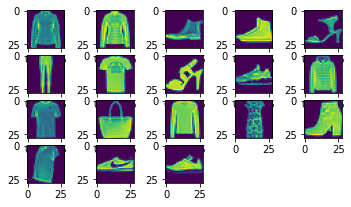

In [53]:
i=0
for image, label in test_dataset.take(18):
  plt.subplot(5,5,i+1)#cuadricula 5x5, graficar en i+1
  image=image.numpy().reshape(28,28)#Elimina dim extra
  plt.imshow(image)#Mostrar imagen
  i+=1

### Explorar los datos procesados 
Grafiquemos una imagen para ver cómo se ve.

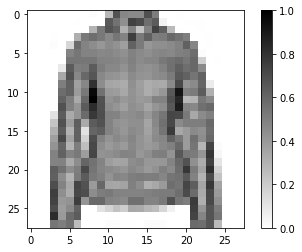

In [46]:
#Tome una sola imagen y elimine la dimensión de color
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))
#Grafique la imagen 
plt.figure()#Nueva figura
plt.imshow(image, cmap=plt.cm.binary)#Imagen
plt.colorbar()#Barra de colores
plt.grid(False)#Cuadriculado Falso
plt.show()#Mostrar imagen

Muestre las primeras 25 imágenes del *conjunto de entrenamiento* y muestre el nombre de la clase debajo de cada imagen. Verifique que los datos estén en el formato correcto y que estemos listos para construir y entrenar la red.

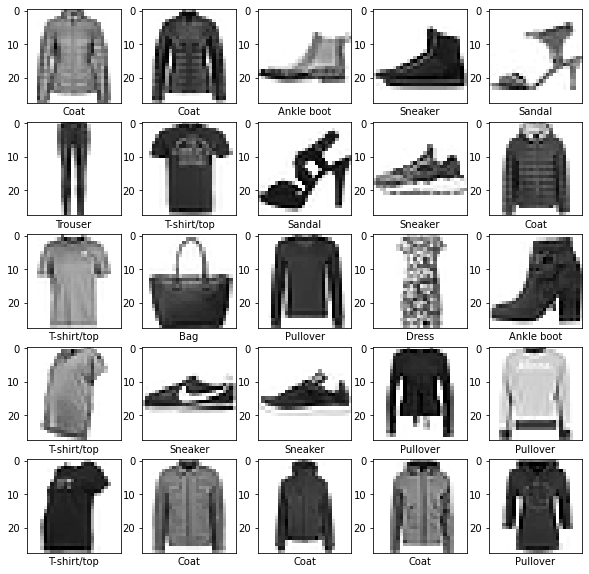

In [65]:
plt.figure(figsize=(10,10))#Espacion en el q se grafican
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))#Eliminar dim extra
    plt.subplot(5,5,i+1)#Crear cuadricula 5x5 para graficar en posicion i
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

##Construyendo el modelo
Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las capas

El componente básico de una red neuronal es la *capa->layer*. Una capa extrae una representación de los datos introducidos en ella. Con suerte, una serie de capas conectadas da como resultado una representación significativa para el problema en cuestión. 

Gran parte del aprendizaje profundo consiste en encadenar capas simples. La mayoría de las capas, como `tf.keras.layers.Dense`, tienen parámetros internos que se ajustan ("aprendieron") durante el entrenamiento.

In [66]:
model = tf.keras.Sequential([#Modelo sequencial
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

Las capas "layers" de esta red son:

* **"convoluciones"** `tf.keras.layers.Conv2D y MaxPooling2D`: la red comienza con dos pares de Conv/MaxPool. La primera capa es un filtro Conv2D (3,3) que se aplica a la imagen de entrada, retiene el tamaño de la imagen original mediante el uso de padding y crea 32 imágenes (convolucionadas) de salida  (por lo que esta capa crea 32 imágenes convolucionadas del mismo tamaño que la entrada ). Después de eso, las 32 salidas se reducen en tamaño utilizando un MaxPooling2D (2,2) con un stride de 2. El próximo Conv2D también tiene un kernel (3,3), toma las 32 imágenes como entrada y crea 64 salidas que son nuevamente reducido en tamaño por una capa MaxPooling2D. Hasta ahora en el curso, hemos descrito lo que hace una convolución, pero aún no hemos cubierto cómo encadenar múltiplos de estos. Volveremos a esto en la lección 4 cuando usemos imágenes en color. En este punto, es suficiente si comprende el tipo de operación que realiza un filtro convolucional.


* **output** `tf.keras.layers.Dense`: una capa de 128 neuronas, seguida de una capa *softmax* de 10 nodos. Cada nodo representa una clase de ropa. Al igual que en la capa anterior, la capa final recibe información de los 128 nodos de la capa anterior y genera un valor en el rango "[0, 1]", que representa la probabilidad de que la imagen pertenezca a esa clase. La suma de los 10 valores de nodo es 1.

> Nota: Usando `softmax` y `SparseCategoricalCrossentropy()` tiene problemas y están parcheados por el modelo `tf.keras`. Un enfoque más seguro, en general, es utilizar una salida lineal (sin función de activación) con `SparseCategoricalCrossentropy(from_logits=True)`.

### Compilar el modelo 
Antes de que el modelo esté listo para el entrenamiento, necesita algunos ajustes más. Estos se agregan durante el paso de *compilación* del modelo:

* *Función de pérdida "Loss function"*: Un algoritmo para medir qué tan lejos están las salidas del modelo de la salida deseada. El objetivo del entrenamiento es medir la pérdida. 
* *Optimizador "Optimizer"*: un algoritmo para ajustar los parámetros internos del modelo a fin de minimizar la pérdida. 
* *Métricas "Metrics"*: se utiliza para monitorear los pasos de entrenamiento y prueba. El siguiente ejemplo usa *accuracy*, la fracción de las imágenes que se clasifican correctamente.

In [68]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Entrenando el modelo
Primero, definimos el comportamiento de iteración para el dataset de entrenamiento: 
1. Repita para siempre especificando `dataset.repeat()` (el parámetro `epochs` que se describe a continuación limita el tiempo que llevamos a cabo el entrenamiento). 2. `dataset.shuffle(60000)` aleatoriza el orden para que nuestro modelo no pueda aprender nada del orden de los ejemplos. 
3. Y `dataset.batch(32)` le dice a `model.fit` que use lotes "grupos" de 32 imágenes y etiquetas al actualizar las variables del modelo.

El entrenamiento se realiza llamando al método `model.fit`: 
1. Introduzca los datos de entrenamiento al modelo usando `train_dataset`. 
2. El modelo aprende a asociar imágenes y etiquetas. 
3. El parámetro `epochs=5` limita el entrenamiento a 5 iteraciones completas del conjunto de datos de entrenamiento, por lo que un total de 5 * 60000 = 300000 ejemplos.

(No se preocupe por `steps_per_epoch`, pronto se eliminará el requisito de tener este indicador).

In [76]:
BATCH_SIZE = 32#Tamaño del Lote
#Tomar datos de cache//Repetir infinitamente//mezclar aleatoriamente//en tamaños de BATCH_SIZE
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)
#https://stackoverflow.com/questions/53514495/what-does-batch-repeat-and-shuffle-do-with-tensorflow-dataset
# https://www.gcptutorials.com/article/how-to-use-tf.data.Dataset.repeat

In [90]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))
#math.ceil redondeo hacia arriba->#1875

Epoch 1/10
1875/1875 [==============================] - 31s 7ms/step - loss: 0.4024 - accuracy: 0.8544
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2620 - accuracy: 0.9053
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2123 - accuracy: 0.9211
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1823 - accuracy: 0.9317
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1583 - accuracy: 0.9420
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1320 - accuracy: 0.9515
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1142 - accuracy: 0.9579
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0954 - accuracy: 0.9646
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0793 - accuracy: 0.9706
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l

A medida que el modelo se entrena, se muestran las métricas de pérdida y precisión "accuracy". Este modelo alcanza una precisión"accuracy" de aproximadamente 0,97 (o 97%) en los datos de entrenamiento.

## Evaluar la precisión


A continuación, compare el rendimiento del modelo en el conjunto de datos de prueba. Use todos los ejemplos que tenemos en el conjunto de datos de prueba para evaluar la precisión "accuracy".

In [92]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy en dataset de prueba:', test_accuracy)

313/313 [==============================] - 3s 8ms/step - loss: 0.2938 - accuracy: 0.9208
Accuracy en dataset de prueba: 0.920799970626831


Resulta que la precisión "accuracy" en el conjunto de datos de prueba es menor que la precisión "accuracy" en el conjunto de datos de entrenamiento. Esto es completamente normal, ya que el modelo fue entrenado en `train_dataset`. Cuando el modelo ve imágenes que nunca ha visto durante el entrenamiento (es decir, del `test_dataset`), podemos esperar que el rendimiento disminuya.

## Haz predicciones y explora

Con el modelo entrenado, podemos usarlo para hacer predicciones sobre algunas imágenes.


In [93]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [94]:
predictions.shape

(32, 10)

Aquí, el modelo predijo la probabilidad de cada etiqueta para cada imagen en el conjunto de prueba. Echemos un vistazo a la primera predicción:

In [97]:
predictions[0]

array([2.2157477e-07, 2.8083065e-11, 6.3080555e-03, 6.8828818e-11,
       9.9022162e-01, 1.1576811e-09, 3.4640117e-03, 1.4631083e-09,
       3.7572399e-08, 6.1177911e-06], dtype=float32)

Una predicción es una matriz de 10 números. Estos describen la "confianza" del modelo de que la imagen corresponde a cada una de las 10 prendas diferentes. Podemos ver qué etiqueta tiene el valor de confianza "confident" más alto:

In [103]:
np.argmax(predictions[0])

4

Por lo tanto, el modelo suele estar más seguro de que esta imagen es una camiseta o `class_names[6]`. Revisemos la etiqueta:

In [113]:
test_labels[0]

4

In [112]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 7, 8, 9])

Podemos graficar esto para ver el conjunto completo de 10 predicciones de clase

In [114]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [132]:
test_images[0].size

784

In [131]:
test_images[...,0][0].size

784

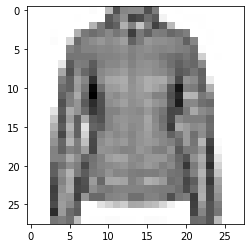

In [120]:
# test_images
plt.imshow(test_images[...,0][0], cmap=plt.cm.binary)

Veamos la imagen 0, las predicciones y la matriz de predicción.

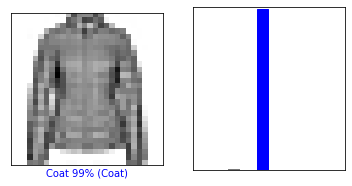

In [115]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

Grafiquemos varias imágenes con sus predicciones. Las etiquetas de predicción correctas son azules y las etiquetas de predicción incorrectas son rojas. El número da el porcentaje (de 100) para la etiqueta predicha. Tenga en cuenta que puede estar equivocado incluso cuando tiene mucha confianza "confident".

In [ ]:
#Trace las primeras imágenes de prueba X, su etiqueta predicha y la etiqueta verdadera 
#Coloree las predicciones correctas en azul, las predicciones incorrectas en rojo
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


Finalmente, use el modelo entrenado para hacer una predicción sobre una sola imagen.

In [ ]:
# Toma una imagen del conjunto de datos de prueba
img = test_images[0]

print(img.shape)

`tf.keras` los modelos están optimizados para hacer predicciones en un *lote*, o colección, de ejemplos a la vez. Entonces, aunque estamos usando una sola imagen, debemos agregarla a una lista:

In [ ]:
#Agregue la imagen a un lote donde sea el único miembro.
img = np.array([img])

print(img.shape)

Ahora prediga la imagen:

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` devuelve una lista de listas, una para cada imagen en el lote de datos. Tome las predicciones para nuestra (única) imagen en el lote:

In [ ]:
np.argmax(predictions_single[0])

Y, como antes, el modelo predice una etiqueta de 6 (camisa).

# Ejercicios 
Experimente con diferentes modelos y vea cómo difieren los resultados en la precisión "accuracy". 
En particular, cambie los siguientes parámetros:
* Establecer épocas de entrenamiento establecidas en 1 
* Número de neuronas en la capa Densa siguiendo a la Flatten. Por ejemplo, vaya muy bajo (e.g, 10) en rangos de hasta 512 y vea cómo cambia la precisión 
* Agregue capas densas adicionales entre Flatten y la capa final "Dense(10)",experimentar con diferentes neuronas "units" en estas capas
* No normalice los valores de los  píxeles y vea el efecto que tiene

Recuerde habilitar GPU para que todo funcione más rápido (Runtime -> Change runtime type -> Hardware accelerator -> GPU).
Además, si tiene problemas, simplemente reinicie todo el entorno y comience desde el principio: 
*   Edit -> Clear all outputs
*   Runtime -> Reset all runtimes
